In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("/content/2020-03-09 Coronavirus Tweets (1).zip",compression='zip',encoding='latin1')

In [ ]:
df=pd.DataFrame(data)
df.head(10)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,527405,1166,NaN,2010-04-15T06:31:39Z,True,es
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,85,508,NaN,2019-10-21T14:56:27Z,False,zh
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en
5,1.236800e+18,1.111290e+18,2020-03-09T00:00:36Z,SaintBrothel,Simple math proves the Chinese government is l...,Twitter for iPhone,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,3725,3812,NaN,2019-03-28T15:34:27Z,False,en
6,1.236800e+18,9.031460e+17,2020-03-09T00:00:38Z,PatriciaSbd,Es increÃ­ble la incompetencia e irresponsabil...,Twitter for Android,NaN,NaN,NaN,True,...,8,ES,"Sabadell, Spain",city,6341,3576,NaN,2017-08-31T06:44:38Z,False,es
7,1.236800e+18,1.222270e+18,2020-03-09T00:00:42Z,BytesCrypto,#CoronavirusOutbreak\nð®ð¹ 7 381\nð«ð·...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,41,157,NaN,2020-01-28T21:40:48Z,False,und
8,1.236800e+18,2.706523e+08,2020-03-09T00:00:42Z,BlackPearl_Inc,Classes were suspended in the following cities...,Twitter Web App,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,399,2832,NaN,2011-03-23T00:50:38Z,False,en
9,1.236800e+18,2.706523e+08,2020-03-09T00:00:43Z,BlackPearl_Inc,Manila Tytana Colleges\n\nTrinity University o...,Twitter Web App,1.236800e+18,270652316.0,BlackPearl_Inc,False,...,0,NaN,NaN,NaN,399,2832,NaN,2011-03-23T00:50:38Z,False,en


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463418 entries, 0 to 463417
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status_id             463418 non-null  float64
 1   user_id               463418 non-null  float64
 2   created_at            463418 non-null  object 
 3   screen_name           463418 non-null  object 
 4   text                  463418 non-null  object 
 5   source                463418 non-null  object 
 6   reply_to_status_id    69127 non-null   float64
 7   reply_to_user_id      81053 non-null   float64
 8   reply_to_screen_name  81053 non-null   object 
 9   is_quote              463418 non-null  bool   
 10  is_retweet            463418 non-null  bool   
 11  favourites_count      463418 non-null  int64  
 12  retweet_count         463418 non-null  int64  
 13  country_code          21973 non-null   object 
 14  place_full_name       22009 non-null   object 
 15  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#To display plots inline; within the notebook window
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,527405,1166,NaN,2010-04-15T06:31:39Z,True,es
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,85,508,NaN,2019-10-21T14:56:27Z,False,zh
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [ ]:
#Extracting English Tweets of all countries
tweets= df[["text","country_code"]][df['lang'] == 'en'].reset_index()
tweets.drop(["index"],axis=1)


#maintain a copy of original tweets before processing it
tweets_original = tweets.copy()

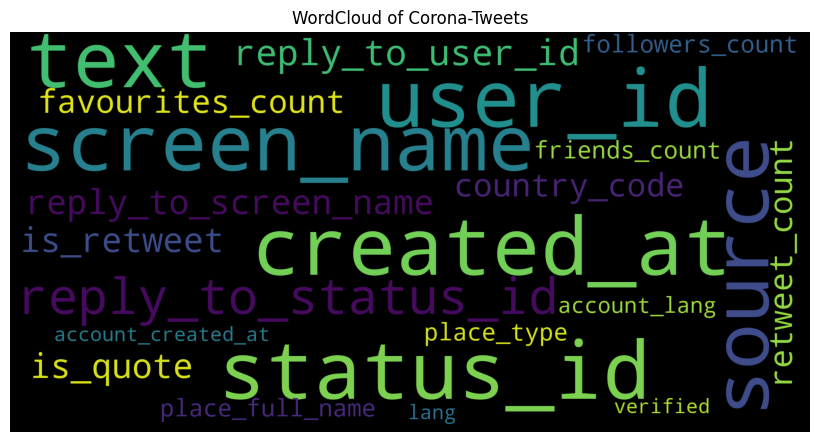

In [ ]:
wordcloud = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(df))
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor="None")
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
#Retaining only alphabets (removing all punctuations and numbers)
tweets["text"] = [re.sub('[^a-zA-Z]', ' ',i) for i in tweets["text"]]


#Converting into lower case
tweets["text"] = [i.lower() for i in tweets["text"]]


#Removing Emoticons
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweets["text"]  = [deEmojify(i) for i in tweets["text"] ]




#Removing URLs
def removeURLs(str):
    ans = ""
    clean_tweet1 = re.match('(.*?)http.*?\s?(.*?)', str)
    clean_tweet2 = re.match('(.*?)https.*?\s?(.*?)', str)
    if clean_tweet1:
        ans=ans+clean_tweet1.group(1)
        ans=ans+clean_tweet1.group(2)
    elif clean_tweet2:
        ans=ans+clean_tweet2.group(1)
        ans=ans+clean_tweet2.group(2)
    else:
        ans = str
    return ans




tweets["text"] = tweets["text"].apply(lambda tweet: removeURLs(tweet))


In [ ]:
#Removing Stop Words
cachedStopWords = set(stopwords.words("english"))
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in cachedStopWords]))


#Define words that we do not want to Stem or Lemmatize
specialWords = ["coronavirus", "covid","quarantine","coronavirusoutbreak","virus","corona","lockdown"]


#Stemming
ps = PorterStemmer()
def stemWords(word):
    if word in specialWords:
            return word
    else:
        return ps.stem(word)
       
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([stemWords(word) for word in tweet.split()]))




#Lemmatization:
wnl = WordNetLemmatizer()
def lemmatizeWords(word):
    if word in specialWords:
            return word
    else:
        return wnl.lemmatize(word)
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([lemmatizeWords(word) for word in tweet.split()]))




#Preparing corpus
corpus=[]
corpus = [word for tweet in tweets["text"] for word in tweet.split()]


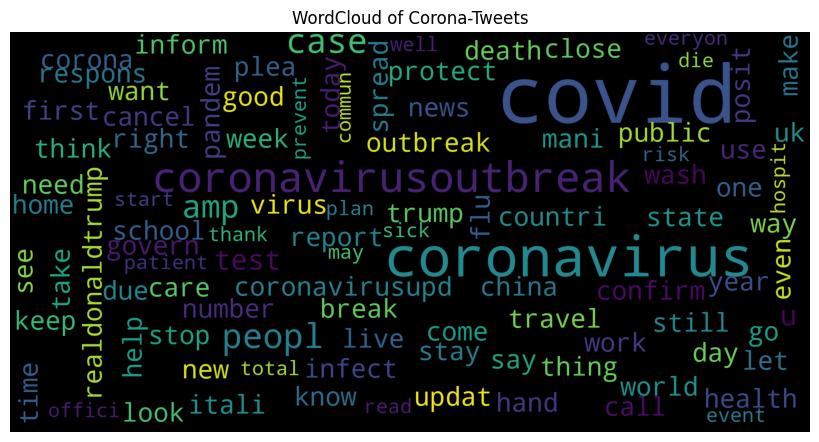

In [ ]:
wordcloud = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(corpus))
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor="None")
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
s = SentimentIntensityAnalyzer()
scores = tweets["text"].apply(lambda tweet: s.polarity_scores(tweet))
scores_df = pd.DataFrame(list(scores))
scores_df.head()

,neg,neu,pos,compound
0,0.125,0.549,0.325,0.6249
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.175,0.825,0.000,-0.6705


In [ ]:
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
pos_word_weight=[]
neu_word_weight=[]
neg_word_weight=[]


def get_word_sentiment(text):
   
    tokenized_text = nltk.word_tokenize(text)
    #print(tokenized_text)    


    for word in tokenized_text:
            if (s.polarity_scores(word)['compound']) >= 0.6:
                pos_word_list.append(word)
                pos_word_weight.append(s.polarity_scores(word)['compound'])
            elif (s.polarity_scores(word)['compound']) <= -0.6:
                neg_word_list.append(word)
                neg_word_weight.append(s.polarity_scores(word)['compound'])
            else:
                neu_word_list.append(word)
                neu_word_weight.append(s.polarity_scores(word)['compound'])


for tweet in tweets["text"]:
    get_word_sentiment(tweet)


print('Total Positive Words in Tweets:',len(pos_word_list))
print('Total Negative Words in Tweets:',len(neg_word_list))
print('Total Neutral Words in Tweets:',len(neu_word_list))


Total Positive Words in Tweets: 12590
Total Negative Words in Tweets: 10244
Total Neutral Words in Tweets: 4260338
